In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(rc={'figure.figsize': [14, 15]}, font_scale=1.3)

### The various features of the cleaned dataset are explained below:
##### 1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
##### 2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
##### 3) from: City from which the flight takes off. It is a categorical feature having 6 unique cities.
##### 4) departure_time : This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
##### 5) Stop: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
##### 6) arrival_time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
##### 7) to: City where the flight will land. It is a categorical feature having 6 unique cities.
##### 8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
##### 9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
##### 10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
##### 11) Price: Target variable stores information of the ticket price.

In [2]:
df1 = pd.read_csv("business.csv")
df1

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585"


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [4]:
df1.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [5]:
df1.duplicated().sum()

0

In [6]:
df2 = pd.read_csv("economy.csv")
df2

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


In [7]:
df = pd.read_csv("Clean_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [8]:
df1['Class'] = "Business"

In [9]:
df2['Class'] = "Economy"

In [10]:
df1

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Business
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",Business
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",Business
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",Business
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",Business


In [11]:
df2

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",Economy
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",Economy
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",Economy
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",Economy


In [12]:
df3=pd.concat([df2,df1] , ignore_index=True)
df3

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",Business
300257,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",Business
300258,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",Business
300259,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",Business


In [13]:
df3['From']=df3['from']

In [14]:
df3['departure_time'] = df3['dep_time']
df3['arrival_time'] = df3['arr_time']
df3.drop(['dep_time','arr_time','from'] , axis=1 , inplace=True)

In [15]:
df3['booking date'] = '10-02-2022'

In [16]:
df3.duplicated().sum()

2

In [17]:
df3.drop_duplicates(inplace=True)

In [18]:
df3.duplicated().sum()

0

In [19]:
df3.isnull().sum()

date              0
airline           0
ch_code           0
num_code          0
time_taken        0
stop              0
to                0
price             0
Class             0
From              0
departure_time    0
arrival_time      0
booking date      0
dtype: int64

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            300259 non-null  object
 1   airline         300259 non-null  object
 2   ch_code         300259 non-null  object
 3   num_code        300259 non-null  int64 
 4   time_taken      300259 non-null  object
 5   stop            300259 non-null  object
 6   to              300259 non-null  object
 7   price           300259 non-null  object
 8   Class           300259 non-null  object
 9   From            300259 non-null  object
 10  departure_time  300259 non-null  object
 11  arrival_time    300259 non-null  object
 12  booking date    300259 non-null  object
dtypes: int64(1), object(12)
memory usage: 32.1+ MB


In [21]:
df3['price'] = df3['price'] .apply(lambda r : r.split(',')[0])+df3['price'] .apply(lambda r : r.split(',')[1]) 

In [22]:
df3['price'] = df3['price'].astype(int)

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            300259 non-null  object
 1   airline         300259 non-null  object
 2   ch_code         300259 non-null  object
 3   num_code        300259 non-null  int64 
 4   time_taken      300259 non-null  object
 5   stop            300259 non-null  object
 6   to              300259 non-null  object
 7   price           300259 non-null  int32 
 8   Class           300259 non-null  object
 9   From            300259 non-null  object
 10  departure_time  300259 non-null  object
 11  arrival_time    300259 non-null  object
 12  booking date    300259 non-null  object
dtypes: int32(1), int64(1), object(11)
memory usage: 30.9+ MB


In [24]:
df3['stop'].value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      243601
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t

In [25]:
df3["stop"][0]

'non-stop '

In [26]:
len(df3["stop"][0])

9

In [27]:
len('2+-stop')

7

In [28]:
def stop_fun(X):
    if len(X)==9 :
            return "zero"
    elif len(X)==7:
            return "two_or_more"
    else :
        return "one"

In [29]:
df3['stop'] = df3['stop'].apply(stop_fun)

In [30]:
df3['stop'].value_counts()

one            250927
zero            36044
two_or_more     13288
Name: stop, dtype: int64

In [31]:
df3['num_codee'] = df3['num_code'].astype(str)

In [32]:
df3['flight'] = df3['ch_code']+ "-" +df3['num_codee']

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 300260
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            300259 non-null  object
 1   airline         300259 non-null  object
 2   ch_code         300259 non-null  object
 3   num_code        300259 non-null  int64 
 4   time_taken      300259 non-null  object
 5   stop            300259 non-null  object
 6   to              300259 non-null  object
 7   price           300259 non-null  int32 
 8   Class           300259 non-null  object
 9   From            300259 non-null  object
 10  departure_time  300259 non-null  object
 11  arrival_time    300259 non-null  object
 12  booking date    300259 non-null  object
 13  num_codee       300259 non-null  object
 14  flight          300259 non-null  object
dtypes: int32(1), int64(1), object(13)
memory usage: 43.6+ MB


In [34]:
df3['date'] = pd.to_datetime(df3['date'] , format='%d-%m-%Y')

In [35]:
df3['booking date'] = pd.to_datetime(df3['booking date'] , format='%d-%m-%Y')

In [36]:
df3['days_left'] = (df3['date']-df3['booking date'] ) / np.timedelta64(1,'D')

In [37]:
df3['days_left'] = df3['days_left'].astype(int)

In [38]:
df3.drop(['ch_code','num_code','num_codee','booking date'] , axis=1 , inplace=True)

In [39]:
df3['departure_time'] = df3['departure_time'] .apply(lambda r : r.split(':')[0])
df3['arrival_time'] = df3['arrival_time'] .apply(lambda r : r.split(':')[0])

In [40]:
df['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [41]:
df3['departure_time'] = df3['departure_time'].astype(int)
df3['arrival_time'] = df3['arrival_time'].astype(int)

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            300259 non-null  datetime64[ns]
 1   airline         300259 non-null  object        
 2   time_taken      300259 non-null  object        
 3   stop            300259 non-null  object        
 4   to              300259 non-null  object        
 5   price           300259 non-null  int32         
 6   Class           300259 non-null  object        
 7   From            300259 non-null  object        
 8   departure_time  300259 non-null  int32         
 9   arrival_time    300259 non-null  int32         
 10  flight          300259 non-null  object        
 11  days_left       300259 non-null  int32         
dtypes: datetime64[ns](1), int32(4), object(7)
memory usage: 33.3+ MB


In [43]:
def get_periods(x):
    if x in range(4,8):
        return 'Early-Morning'
    elif x in range(8,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,20):
        return 'Evening'
    elif x in [20,21,22,23,0] :
        return 'night'
    else:
        return 'late-Night'

In [44]:
df3['departure_time'] = df3['departure_time'].apply(get_periods)
df3['arrival_time'] = df3['arrival_time'].apply(get_periods)

df3

,date,airline,time_taken,stop,to,price,Class,From,departure_time,arrival_time,flight,days_left
0,2022-02-11,SpiceJet,02h 10m,zero,Mumbai,5953,Economy,Delhi,Evening,night,SG-8709,1
1,2022-02-11,SpiceJet,02h 20m,zero,Mumbai,5953,Economy,Delhi,Early-Morning,Morning,SG-8157,1
2,2022-02-11,AirAsia,02h 10m,zero,Mumbai,5956,Economy,Delhi,Early-Morning,Early-Morning,I5-764,1
3,2022-02-11,Vistara,02h 15m,zero,Mumbai,5955,Economy,Delhi,Morning,Afternoon,UK-995,1
4,2022-02-11,Vistara,02h 20m,zero,Mumbai,5955,Economy,Delhi,Morning,Morning,UK-963,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,10h 05m,one,Hyderabad,69265,Business,Chennai,Morning,Evening,UK-822,49
300257,2022-03-31,Vistara,10h 25m,one,Hyderabad,77105,Business,Chennai,Afternoon,night,UK-826,49
300258,2022-03-31,Vistara,13h 50m,one,Hyderabad,79099,Business,Chennai,Early-Morning,night,UK-832,49
300259,2022-03-31,Vistara,10h 00m,one,Hyderabad,81585,Business,Chennai,Early-Morning,Evening,UK-828,49


In [45]:
df3['time'] = df3['time_taken'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [46]:
df3['time']

0          210
1          220
2          210
3          215
4          220
          ... 
300256    1005
300257    1025
300258    1350
300259    1000
300260    1005
Name: time, Length: 300259, dtype: int32

In [47]:
df3['time'] = df3['time'].astype(str)

In [48]:
def time1(x) :
    if len(x)==3 :
        return x[0:1]
    else :
        return x[0:2]

In [49]:
def time2(x) :
        return x[-2:]

In [50]:
df3['min1'] = df3['time'].apply(time1)
df3['min2'] = df3['time'].apply(time2)

In [51]:
df3['min1'] = df3['min1'].astype(int)
df3['min2'] = df3['min2'].astype(int)
df3['min1'] = df3['min1']*60

In [52]:
df3['duration'] = df3['min1'] + df3['min2']

In [53]:
df3['duration'] = df3['duration']/60.0

In [54]:
df3['duration']=df3['duration'].apply(lambda x:round(x,2))

In [55]:
df3['duration']

0          2.17
1          2.33
2          2.17
3          2.25
4          2.33
          ...  
300256    10.08
300257    10.42
300258    13.83
300259    10.00
300260    10.08
Name: duration, Length: 300259, dtype: float64

In [56]:
df3.drop(['time_taken' , 'min1' , 'min2' , 'time'] ,axis = 1 , inplace=True )

In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300259 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            300259 non-null  datetime64[ns]
 1   airline         300259 non-null  object        
 2   stop            300259 non-null  object        
 3   to              300259 non-null  object        
 4   price           300259 non-null  int32         
 5   Class           300259 non-null  object        
 6   From            300259 non-null  object        
 7   departure_time  300259 non-null  object        
 8   arrival_time    300259 non-null  object        
 9   flight          300259 non-null  object        
 10  days_left       300259 non-null  int32         
 11  duration        300259 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(2), object(8)
memory usage: 35.6+ MB


In [58]:
df3

,date,airline,stop,to,price,Class,From,departure_time,arrival_time,flight,days_left,duration
0,2022-02-11,SpiceJet,zero,Mumbai,5953,Economy,Delhi,Evening,night,SG-8709,1,2.17
1,2022-02-11,SpiceJet,zero,Mumbai,5953,Economy,Delhi,Early-Morning,Morning,SG-8157,1,2.33
2,2022-02-11,AirAsia,zero,Mumbai,5956,Economy,Delhi,Early-Morning,Early-Morning,I5-764,1,2.17
3,2022-02-11,Vistara,zero,Mumbai,5955,Economy,Delhi,Morning,Afternoon,UK-995,1,2.25
4,2022-02-11,Vistara,zero,Mumbai,5955,Economy,Delhi,Morning,Morning,UK-963,1,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,one,Hyderabad,69265,Business,Chennai,Morning,Evening,UK-822,49,10.08
300257,2022-03-31,Vistara,one,Hyderabad,77105,Business,Chennai,Afternoon,night,UK-826,49,10.42
300258,2022-03-31,Vistara,one,Hyderabad,79099,Business,Chennai,Early-Morning,night,UK-832,49,13.83
300259,2022-03-31,Vistara,one,Hyderabad,81585,Business,Chennai,Early-Morning,Evening,UK-828,49,10.00


In [59]:
df3.describe()

,price,days_left,duration
count,300259.000000,300259.000000,300259.000000
mean,20845.940408,26.004529,12.240689
std,22642.572754,13.560967,7.241319
min,100.000000,1.000000,1.000000
25%,4783.000000,15.000000,6.830000
50%,7425.000000,26.000000,11.250000
75%,42457.000000,38.000000,16.170000
max,99680.000000,49.000000,55.920000


### Detect outliers 

<AxesSubplot:xlabel='price'>

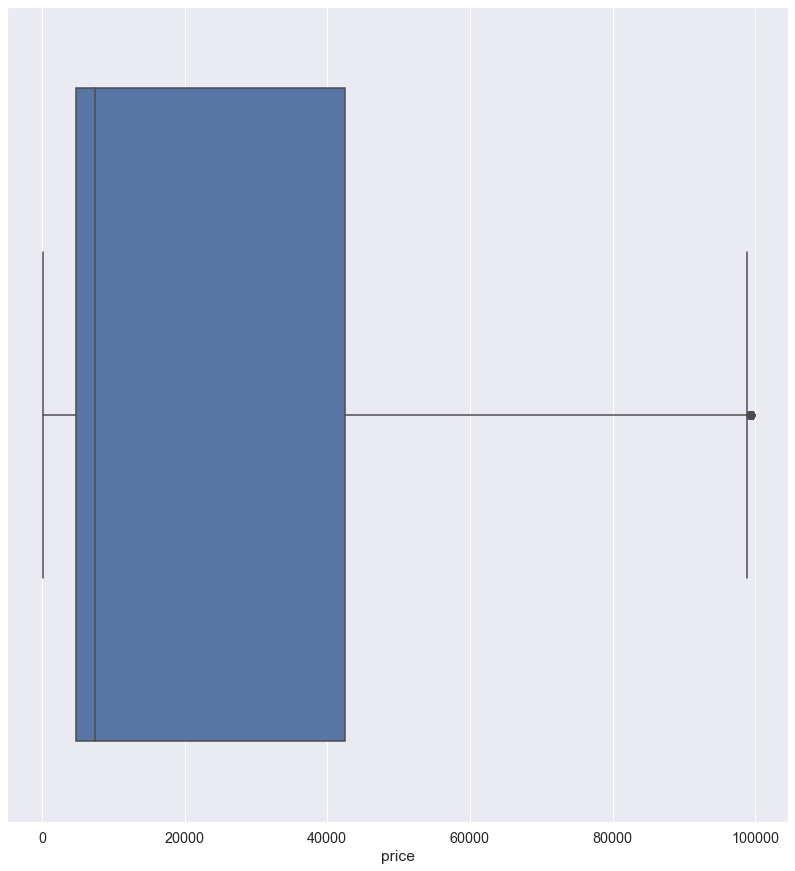

In [60]:
sns.boxplot(x='price' , data = df3)


<AxesSubplot:xlabel='duration'>

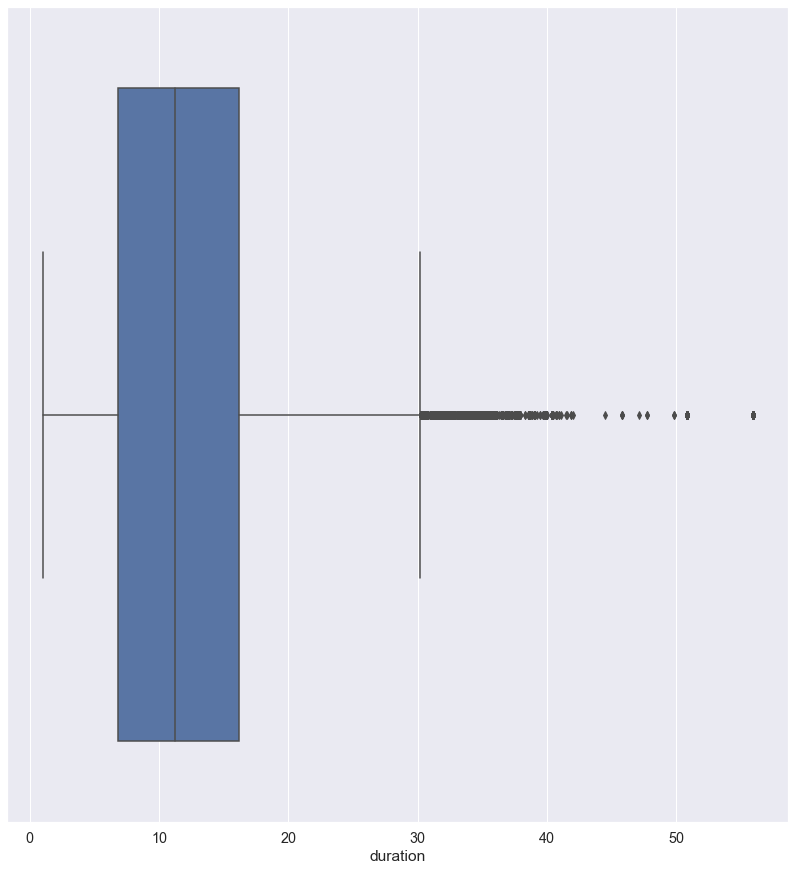

In [61]:
sns.boxplot(x='duration' , data = df3)


In [62]:
from datasist.structdata import detect_outliers 

In [63]:
outliers_indices = detect_outliers(df3, 0, ['price'])
len(outliers_indices)

16

In [64]:
outliers_indices1 = detect_outliers(df3, 0, ['duration'])
len(outliers_indices1)

2240

In [65]:
df3.drop(outliers_indices, inplace=True)


In [66]:
df3.drop(outliers_indices1, inplace=True) 
df3.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='price'>

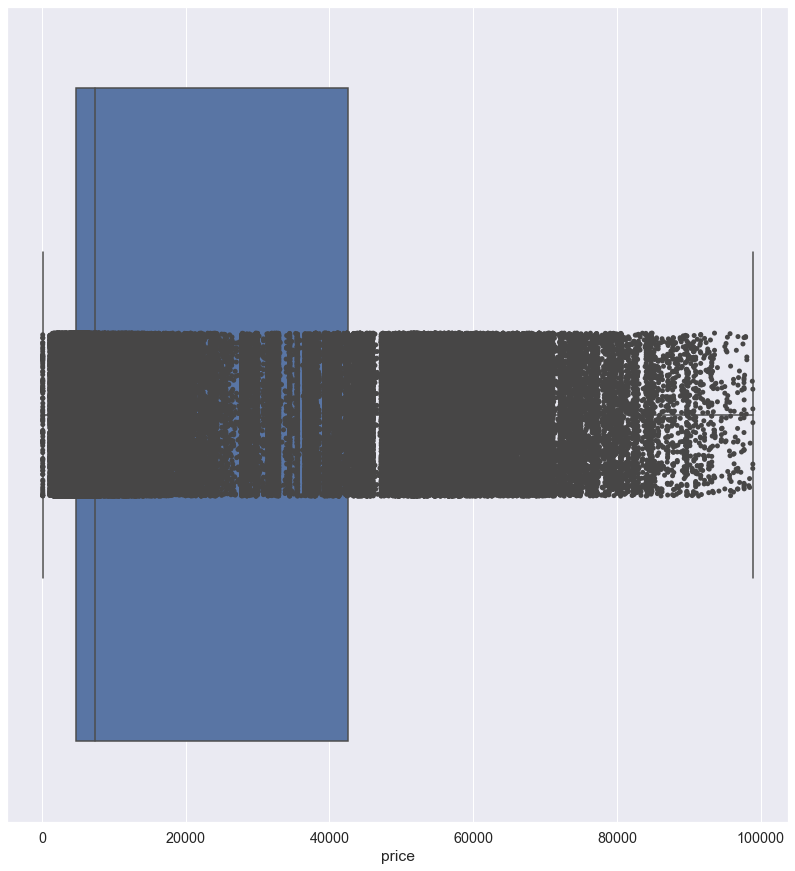

In [67]:
sns.boxplot(x='price', data=df3)
sns.stripplot(x='price', data=df3, color="#474646")

<AxesSubplot:xlabel='duration'>

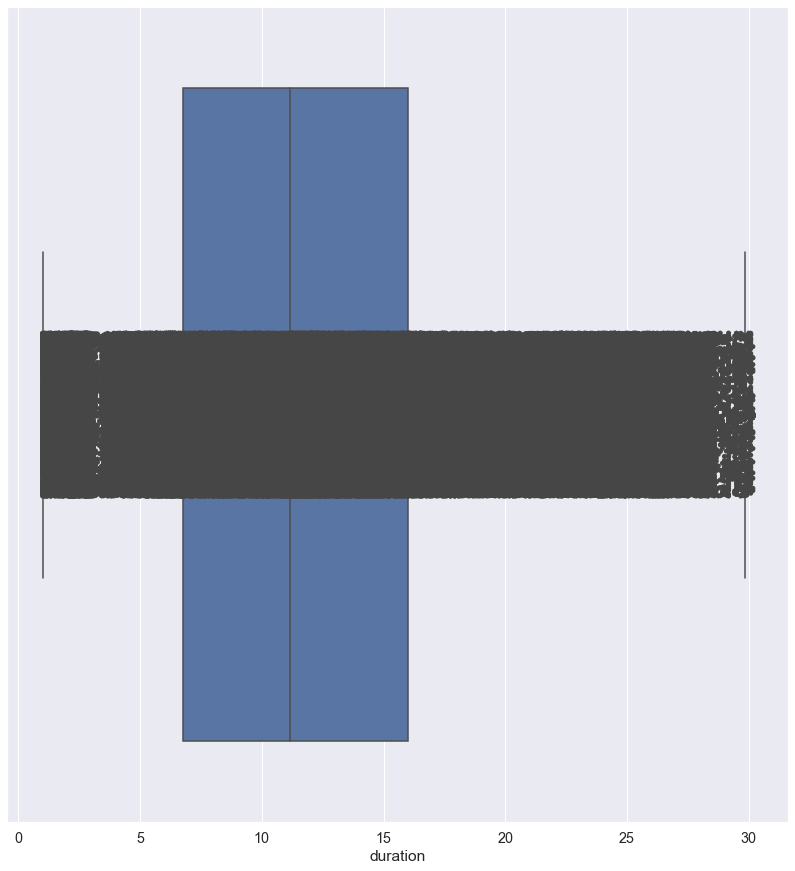

In [68]:
sns.boxplot(x='duration', data=df3)
sns.stripplot(x='duration', data=df3, color="#474646")

In [69]:
df3['Day'] = df3['date'].dt.day_name()

In [70]:
df3

,date,airline,stop,to,price,Class,From,departure_time,arrival_time,flight,days_left,duration,Day
0,2022-02-11,SpiceJet,zero,Mumbai,5953,Economy,Delhi,Evening,night,SG-8709,1,2.17,Friday
1,2022-02-11,SpiceJet,zero,Mumbai,5953,Economy,Delhi,Early-Morning,Morning,SG-8157,1,2.33,Friday
2,2022-02-11,AirAsia,zero,Mumbai,5956,Economy,Delhi,Early-Morning,Early-Morning,I5-764,1,2.17,Friday
3,2022-02-11,Vistara,zero,Mumbai,5955,Economy,Delhi,Morning,Afternoon,UK-995,1,2.25,Friday
4,2022-02-11,Vistara,zero,Mumbai,5955,Economy,Delhi,Morning,Morning,UK-963,1,2.33,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297998,2022-03-31,Vistara,one,Hyderabad,69265,Business,Chennai,Morning,Evening,UK-822,49,10.08,Thursday
297999,2022-03-31,Vistara,one,Hyderabad,77105,Business,Chennai,Afternoon,night,UK-826,49,10.42,Thursday
298000,2022-03-31,Vistara,one,Hyderabad,79099,Business,Chennai,Early-Morning,night,UK-832,49,13.83,Thursday
298001,2022-03-31,Vistara,one,Hyderabad,81585,Business,Chennai,Early-Morning,Evening,UK-828,49,10.00,Thursday


## univariate analysis and visualization 

### date

In [71]:
len(df3['date'].value_counts())

49

In [72]:
df3['date'].value_counts()

2022-03-07    6596
2022-03-21    6561
2022-02-28    6555
2022-03-14    6554
2022-03-08    6540
2022-03-01    6506
2022-03-06    6502
2022-03-15    6500
2022-03-22    6499
2022-03-13    6495
2022-03-23    6493
2022-03-10    6485
2022-03-20    6467
2022-03-12    6461
2022-03-02    6460
2022-03-24    6458
2022-03-18    6457
2022-03-04    6453
2022-03-25    6441
2022-03-19    6438
2022-03-03    6435
2022-03-26    6392
2022-03-16    6380
2022-02-21    6372
2022-02-23    6367
2022-03-05    6363
2022-03-11    6363
2022-02-27    6362
2022-02-22    6335
2022-03-09    6327
2022-02-25    6286
2022-02-24    6277
2022-03-27    6276
2022-03-17    6258
2022-02-26    6206
2022-03-31    6119
2022-03-28    6114
2022-03-30    6040
2022-03-29    6030
2022-02-20    5763
2022-02-18    5717
2022-02-16    5685
2022-02-17    5635
2022-02-19    5593
2022-02-15    5349
2022-02-14    5016
2022-02-13    4174
2022-02-12    3958
2022-02-11    1890
Name: date, dtype: int64

### airline

In [73]:
df3['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [74]:
df3.value_counts('airline')

airline
Vistara      127024
Air India     79601
Indigo        43053
GO FIRST      23177
AirAsia       16035
SpiceJet       9011
StarAir          61
Trujet           41
dtype: int64

<AxesSubplot:xlabel='airline', ylabel='count'>

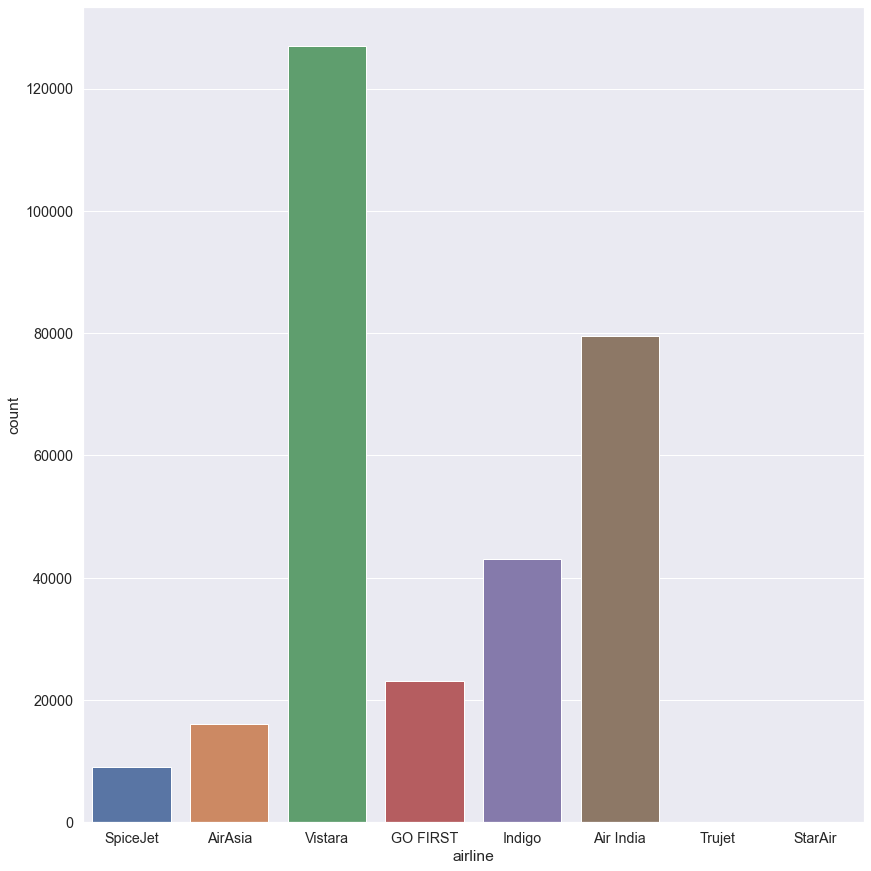

In [75]:
sns.countplot(data=df3,x='airline')

### From

In [76]:
df3['From'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [77]:
df3['From'].value_counts()

Delhi        61181
Mumbai       60712
Bangalore    51544
Kolkata      45875
Hyderabad    40687
Chennai      38004
Name: From, dtype: int64

<AxesSubplot:xlabel='From', ylabel='count'>

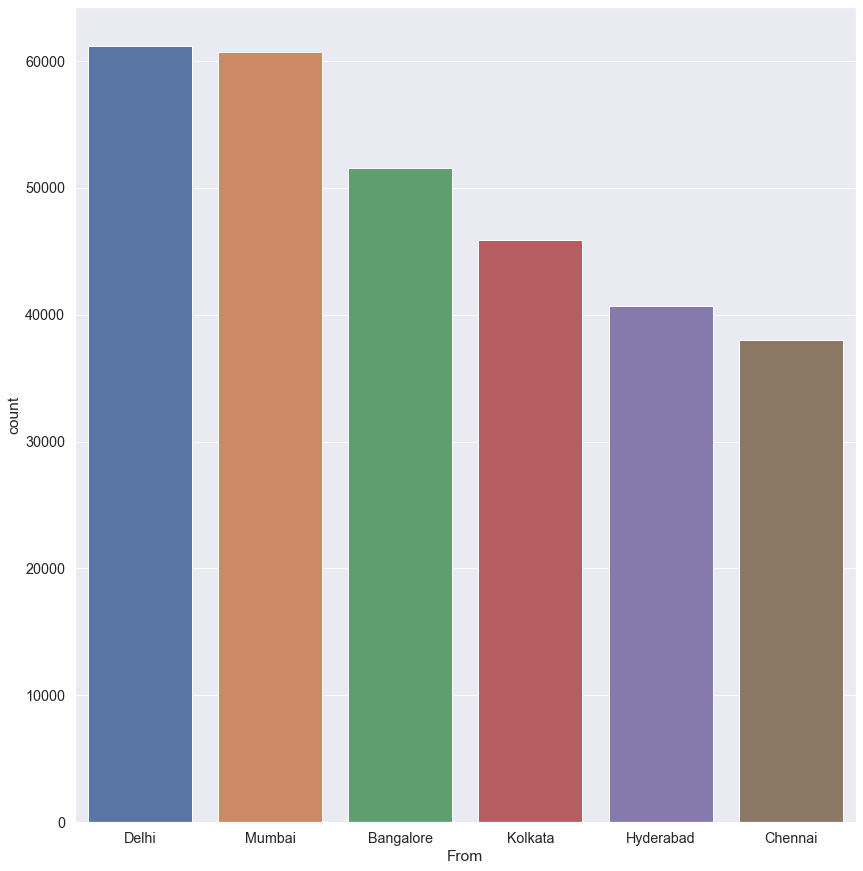

In [78]:
sns.countplot(data=df3,x='From')

### stop

In [79]:
df3['stop'].value_counts()

one            249623
zero            35914
two_or_more     12466
Name: stop, dtype: int64

<AxesSubplot:xlabel='stop', ylabel='count'>

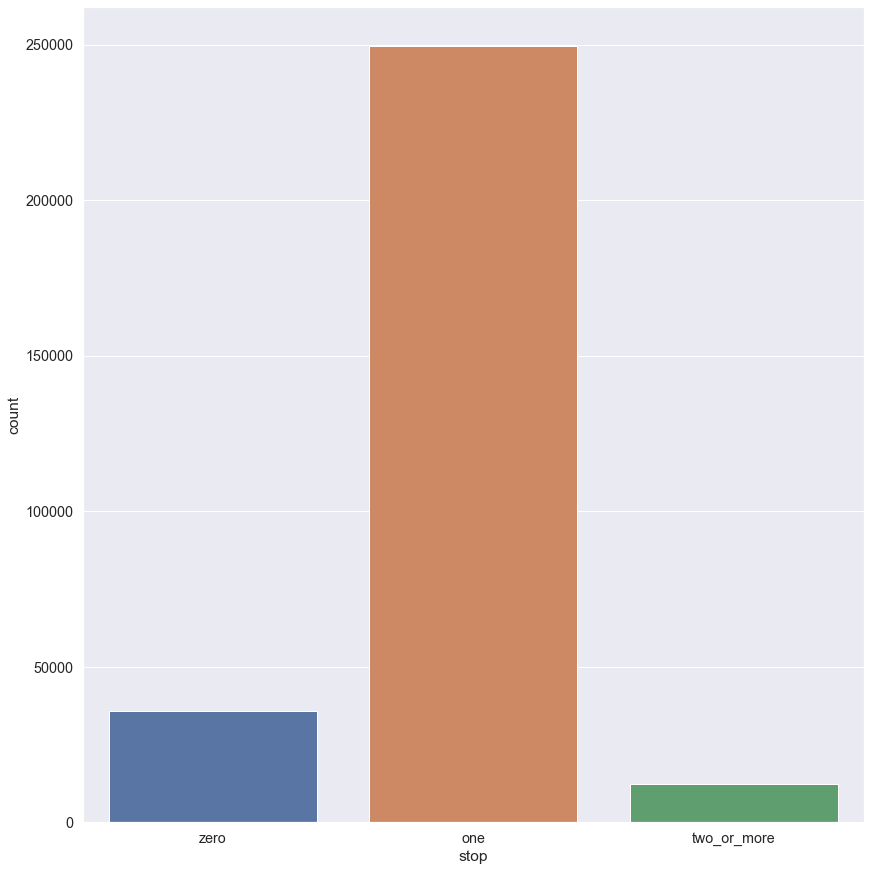

In [80]:
sns.countplot(data=df3,x='stop')

### to

In [81]:
df3['to'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [82]:
df3['to'].value_counts()

Mumbai       58687
Delhi        57163
Bangalore    50676
Kolkata      49161
Hyderabad    42388
Chennai      39928
Name: to, dtype: int64

<AxesSubplot:xlabel='to', ylabel='count'>

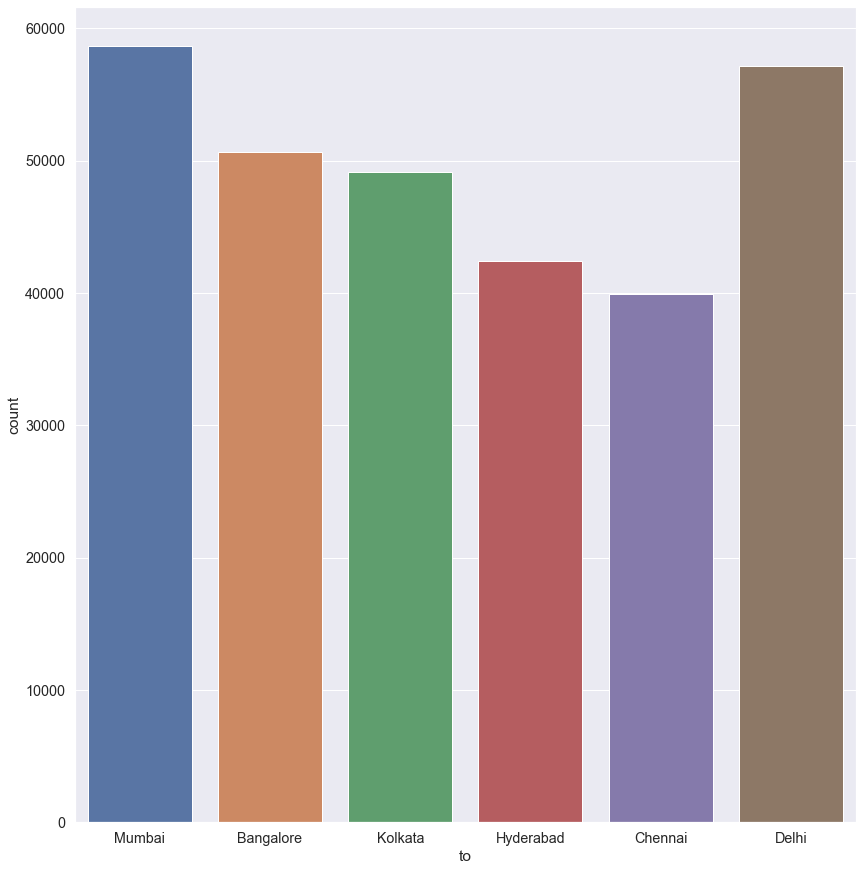

In [83]:
sns.countplot(data=df3,x='to')

#### price

In [84]:
df3['price'].describe()

count    298003.000000
mean      20877.488015
std       22670.730456
min         100.000000
25%        4757.000000
50%        7424.000000
75%       42521.000000
max       98919.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='price'>

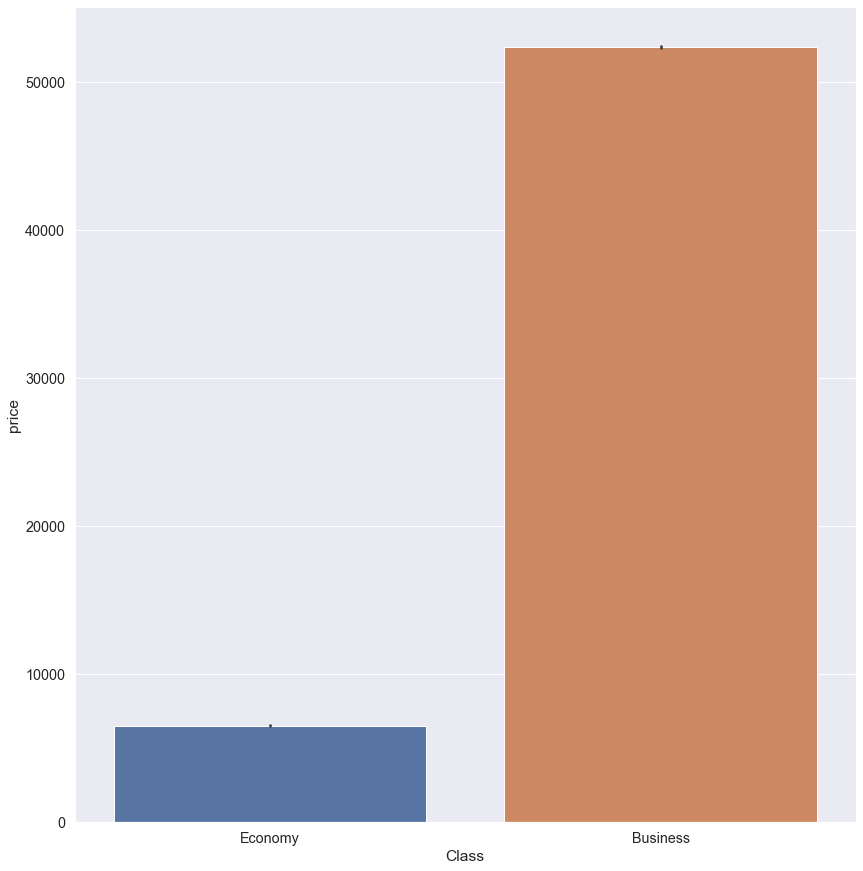

In [85]:
sns.barplot(data=df3,x="Class",y="price",estimator=np.mean)

<AxesSubplot:xlabel='price', ylabel='Density'>

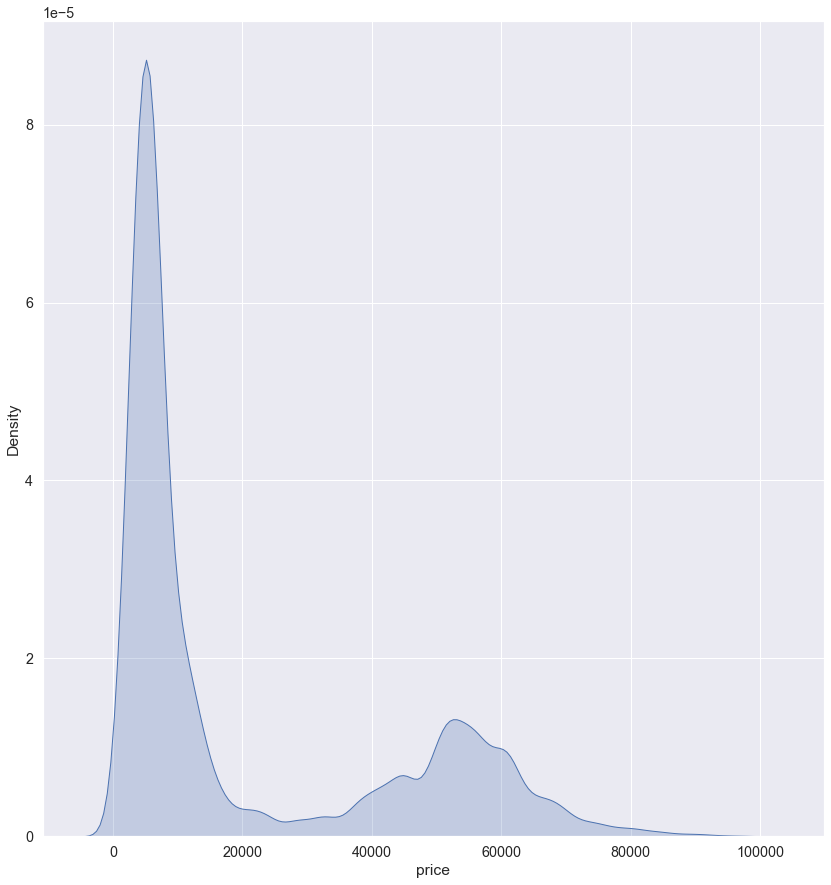

In [86]:
sns.kdeplot(data=df3,x='price',shade=True)

#### class

In [87]:
df3['Class'].value_counts()

Economy     204768
Business     93235
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

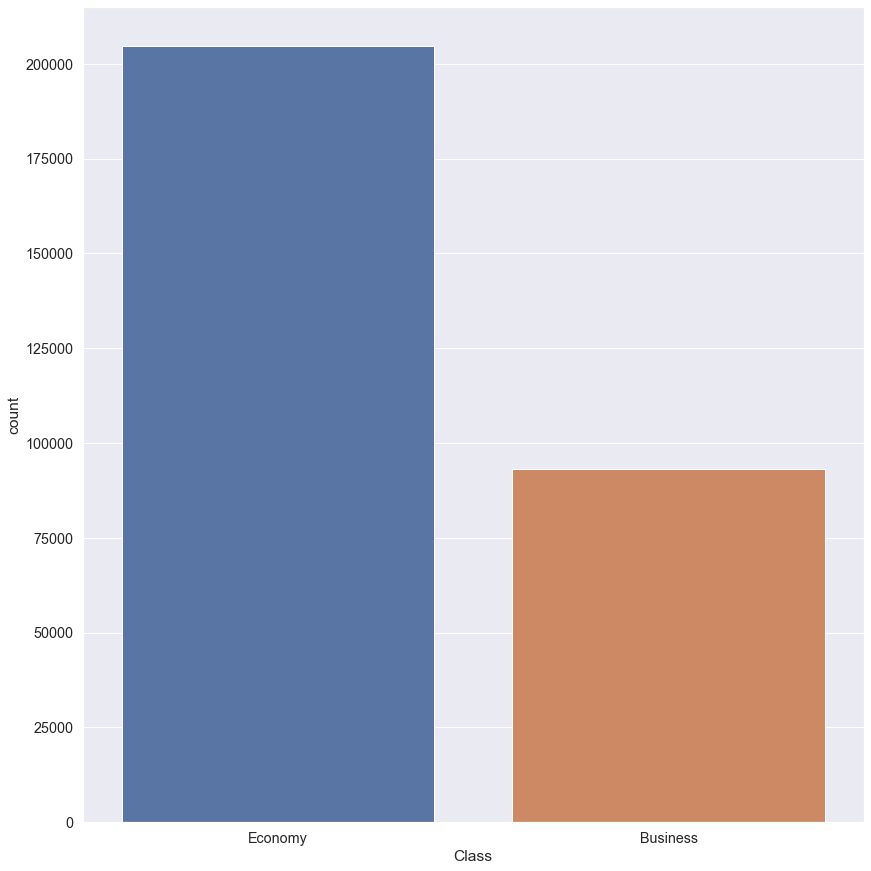

In [88]:
sns.countplot(data=df3 , x='Class')

#### departure_time

In [89]:
df3['departure_time'].value_counts()

Morning          74496
Early-Morning    61469
Afternoon        58675
Evening          52716
night            49760
late-Night         887
Name: departure_time, dtype: int64

<AxesSubplot:xlabel='departure_time', ylabel='count'>

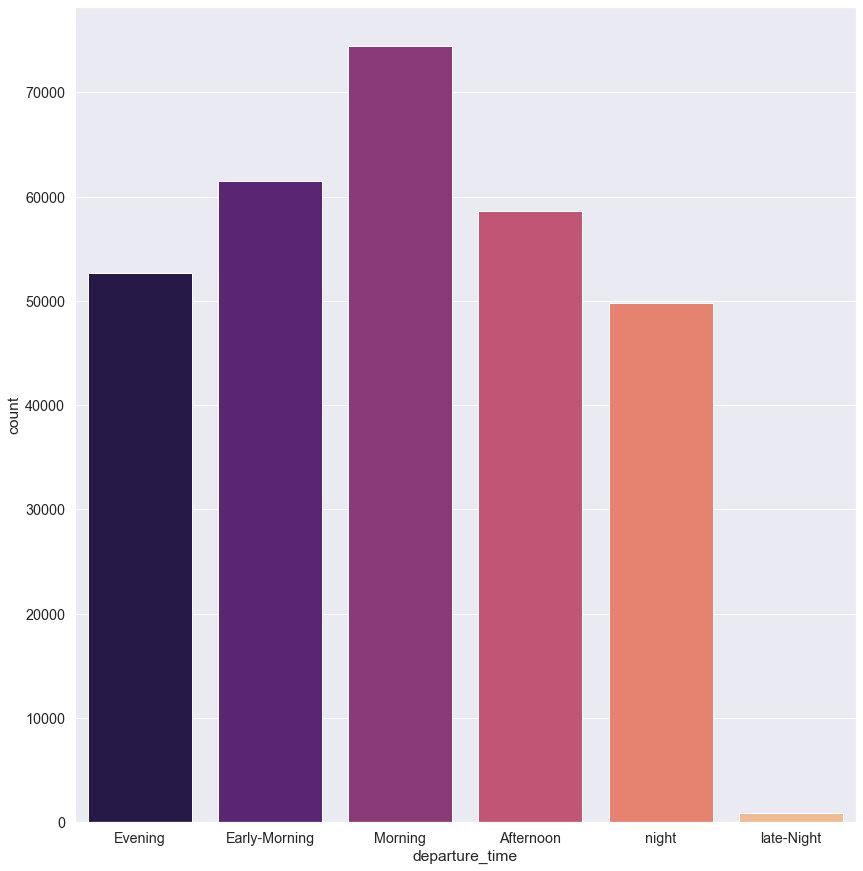

In [90]:
sns.countplot(data=df3 , x='departure_time',palette ='magma')

#### arrival_time

In [91]:
df3['arrival_time'].value_counts()

night            100567
Morning           63716
Evening           60678
Afternoon         53033
Early-Morning     13871
late-Night         6138
Name: arrival_time, dtype: int64

<AxesSubplot:xlabel='arrival_time', ylabel='count'>

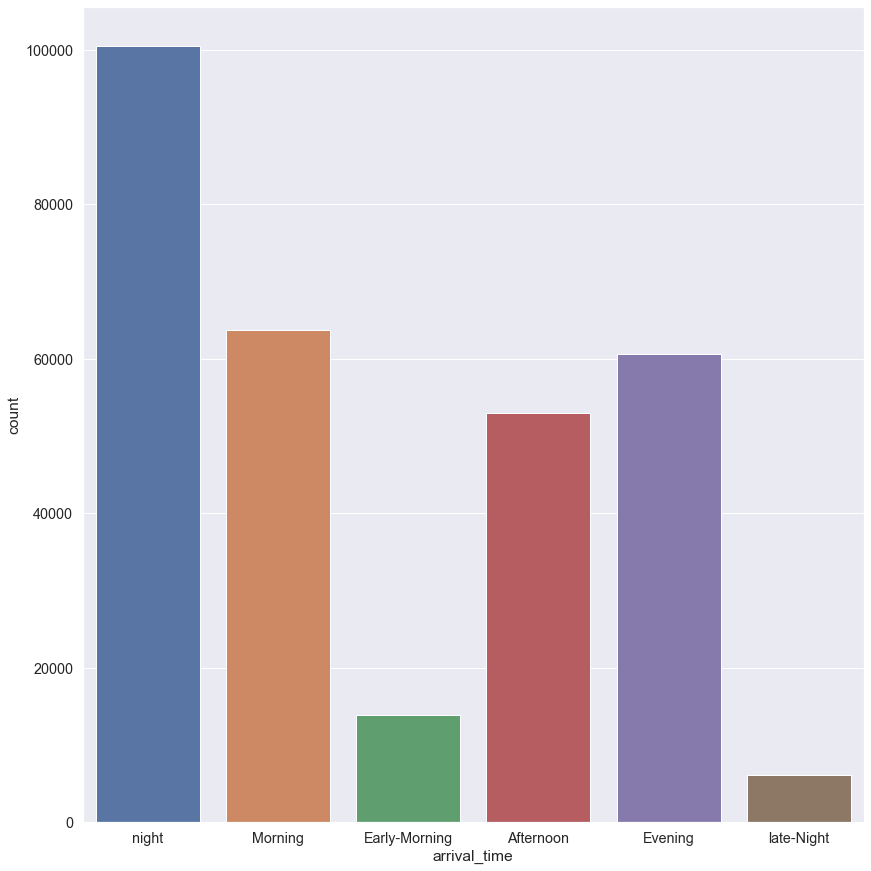

In [92]:
sns.countplot(data=df3 , x='arrival_time') 
#شئ طبيعي ان معظم الوصول يكون بليل لأن معظم التحرك كان الصبح ومتوسط الرحلات عندنا 

#### flight

In [93]:
df3['flight'].value_counts()

UK-706     3120
UK-772     2730
UK-720     2630
UK-836     2537
UK-874     2422
           ... 
6E-2939       1
SG-8193       1
SG-1058       1
SG-9923       1
SG-8913       1
Name: flight, Length: 1567, dtype: int64

In [94]:
df3['flight'].value_counts().count()

1567

In [95]:
df3['flight'].value_counts()[0:5] #most 5

UK-706    3120
UK-772    2730
UK-720    2630
UK-836    2537
UK-874    2422
Name: flight, dtype: int64

#### days_left

In [96]:
df3['days_left'].describe()

count    298003.000000
mean         26.030459
std          13.551411
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

In [97]:
df3['days_left'].value_counts()

25    6596
39    6561
18    6555
32    6554
26    6540
19    6506
24    6502
33    6500
40    6499
31    6495
41    6493
28    6485
38    6467
30    6461
20    6460
42    6458
36    6457
22    6453
43    6441
37    6438
21    6435
44    6392
34    6380
11    6372
13    6367
23    6363
29    6363
17    6362
12    6335
27    6327
15    6286
14    6277
45    6276
35    6258
16    6206
49    6119
46    6114
48    6040
47    6030
10    5763
8     5717
6     5685
7     5635
9     5593
5     5349
4     5016
3     4174
2     3958
1     1890
Name: days_left, dtype: int64

In [98]:
df3['days_left'].value_counts()[0:5]

25    6596
39    6561
18    6555
32    6554
26    6540
Name: days_left, dtype: int64

<AxesSubplot:xlabel='days_left', ylabel='Density'>

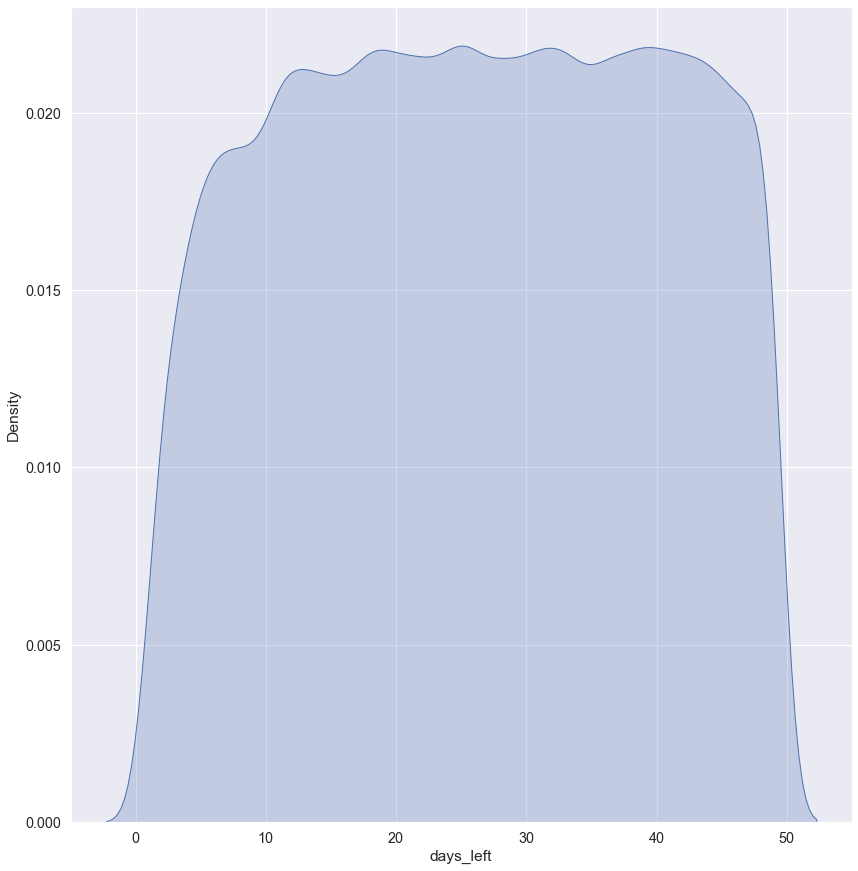

In [99]:
sns.kdeplot(x=df3['days_left'],shade=True)

#### duration

In [100]:
df3['duration'].describe()

count    298003.000000
mean         12.074272
std           6.992328
min           1.000000
25%           6.750000
50%          11.170000
75%          16.000000
max          30.170000
Name: duration, dtype: float64

C:\myAnaconda\envs\epsilon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

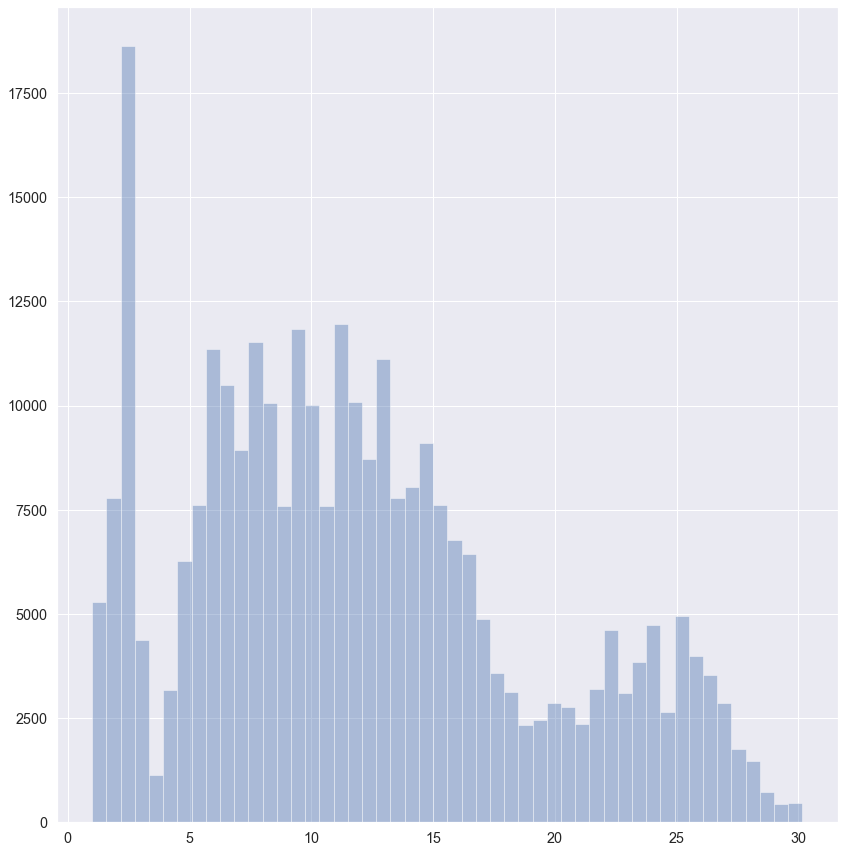

In [101]:
sns.distplot(x=df3['duration'] ,kde=False)

#### Day

In [102]:
df3.value_counts('Day')

Day
Monday       43768
Tuesday      43759
Wednesday    43752
Thursday     43667
Sunday       42039
Saturday     41411
Friday       39607
dtype: int64

<AxesSubplot:xlabel='Day', ylabel='count'>

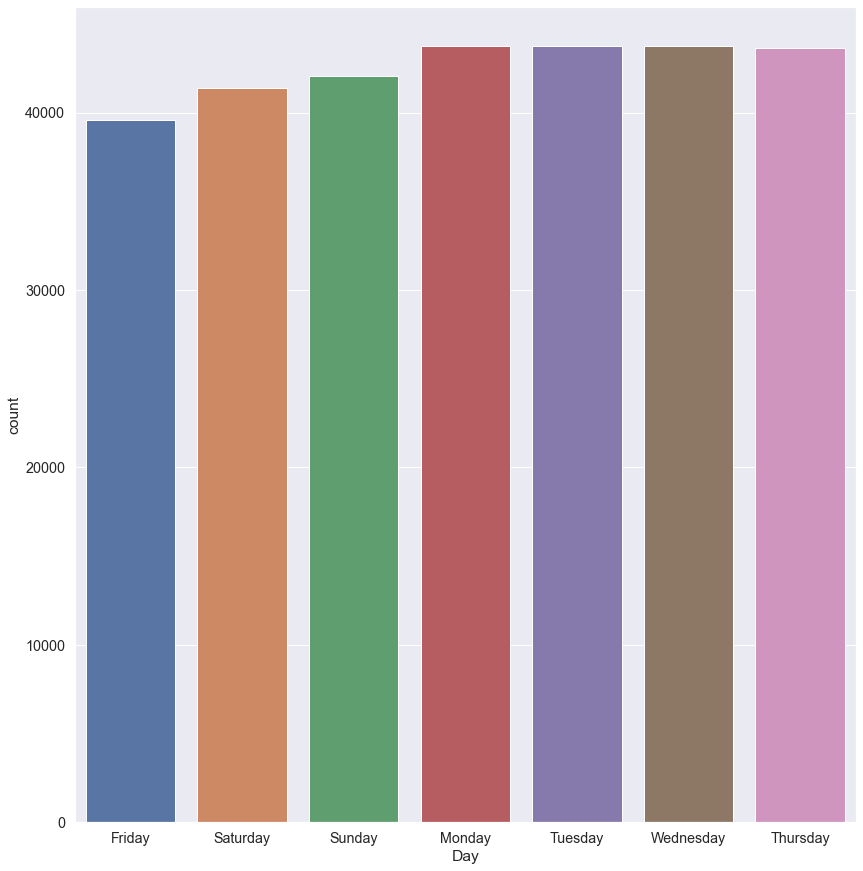

In [103]:
sns.countplot(data = df3,x = 'Day')

### Correlation

In [104]:
df3.corr()

,price,days_left,duration
price,1.000000,-0.090162,0.214884
days_left,-0.090162,1.000000,-0.033793
duration,0.214884,-0.033793,1.000000


<AxesSubplot:>

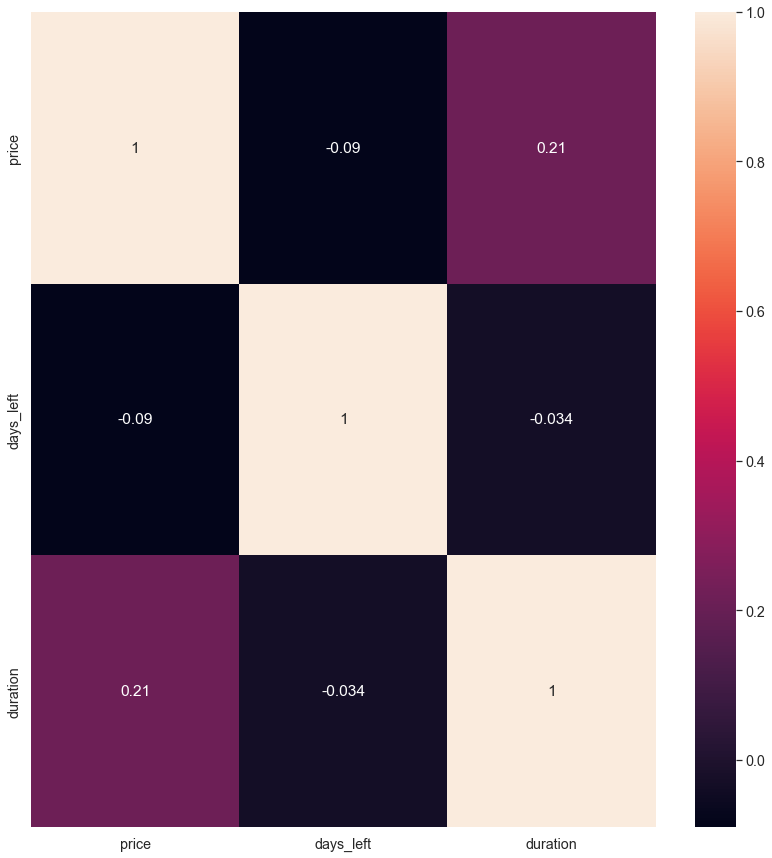

In [105]:
sns.heatmap(df3.corr(),annot=True)

Average prices for all airlines compared to each other

<AxesSubplot:xlabel='airline', ylabel='price'>

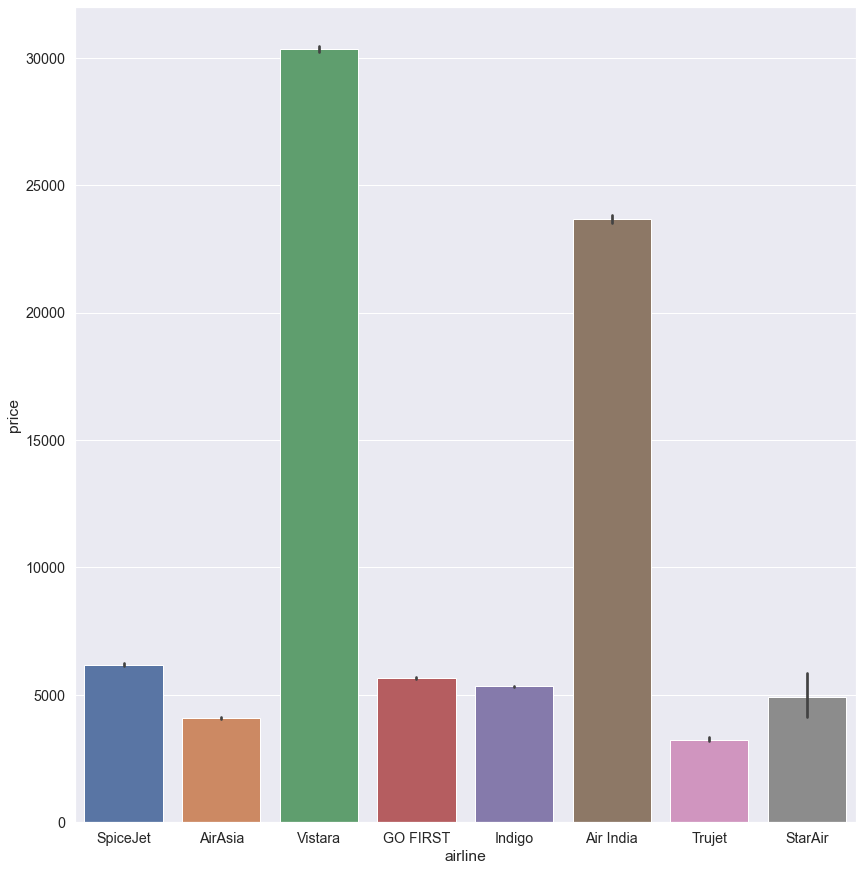

In [106]:
sns.barplot(data=df3,x="airline",y="price",estimator=np.mean)

## Analysis Questions

#### Calculate the average ticket price for each airline

In [107]:
df.groupby('airline').mean()['price']

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

In [108]:
pd.pivot_table(df3, values='price', index=['airline'], columns='Class' , aggfunc= 'mean')

Class,Business,Economy
airline,,
Air India,47113.803576,7233.662697
AirAsia,NaN,4098.750109
GO FIRST,NaN,5651.930578
Indigo,NaN,5329.615520
SpiceJet,NaN,6179.278881
StarAir,NaN,4932.655738
Trujet,NaN,3244.634146
Vistara,55249.758956,7757.668713


#### Highest average airfare

In [109]:
df.groupby('airline').mean()['price'].idxmax()

'Vistara'

#### The day people want to travel the most

In [110]:
df3['date'].value_counts().idxmax()

Timestamp('2022-03-07 00:00:00')

#### Draw the relationship between the price of airline tickets and the name of the day

<AxesSubplot:xlabel='Day', ylabel='price'>

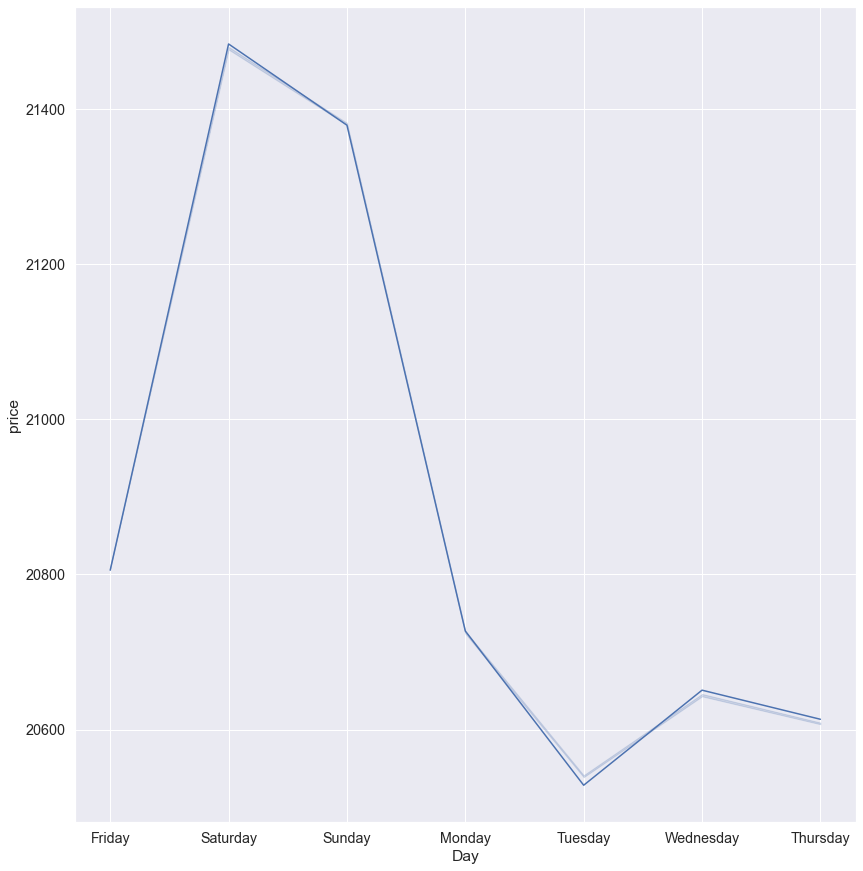

In [111]:
sns.lineplot(x='Day' , y='price' ,data=df3,ci=True)
# We note here that in Weekend the prices of airline tickets will be more expensive

#### The average price of a flight ticket between each city and other cities (Economy,Business)

In [112]:
pd.pivot_table(df3[df3['Class']=='Economy'], values='price', index=['From'], columns='to' , aggfunc= 'mean')

to,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
From,,,,,,
Bangalore,NaN,7098.984391,6108.466848,6185.707240,7335.689292,6353.101996
Chennai,7105.684154,NaN,6008.076421,5945.465729,7287.675670,6482.941053
Delhi,6165.635601,6064.212482,NaN,6022.032278,7031.320969,6059.826087
Hyderabad,6206.377453,6034.967446,6071.210404,NaN,6822.827793,5923.643278
Kolkata,7452.420370,7838.210156,7145.475397,7463.416198,NaN,7364.075643
Mumbai,6382.619356,6395.828164,5889.281400,5744.843827,7214.468289,NaN


In [113]:
pd.pivot_table(df3[df3['Class']=='Business'], values='price', index=['From'], columns='to' , aggfunc= 'mean')

to,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
From,,,,,,
Bangalore,NaN,52183.318873,48114.900184,50395.796948,58821.244190,57962.560479
Chennai,52968.791866,NaN,52405.328314,51559.874283,56876.777307,55744.016076
Delhi,48576.027921,51787.440411,NaN,44376.438980,55710.465996,44364.442811
Hyderabad,50358.290706,51131.948661,44250.700281,NaN,53714.007585,52114.286365
Kolkata,58314.033043,56503.259674,54347.475270,54412.745944,NaN,57157.562141
Mumbai,57543.185088,55530.231410,43824.099641,51585.386141,57067.003662,NaN


#### The most city there are flights from

In [114]:
df3['From'].value_counts().idxmax()
# Of course, Delhi is the city from which most flights depart because it is the capital of India

'Delhi'

<AxesSubplot:xlabel='From', ylabel='count'>

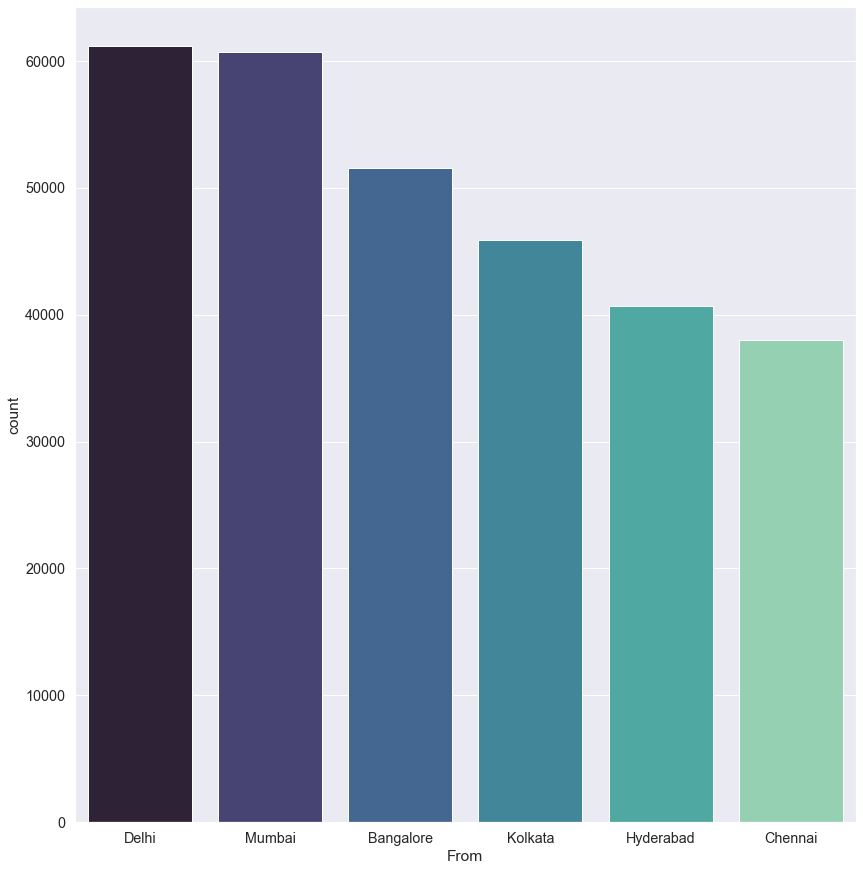

In [115]:
sns.countplot(data=df3,x='From',palette='mako')

#### The most city there are flights to

In [116]:
df3['to'].value_counts().idxmax()

'Mumbai'

<AxesSubplot:xlabel='to', ylabel='count'>

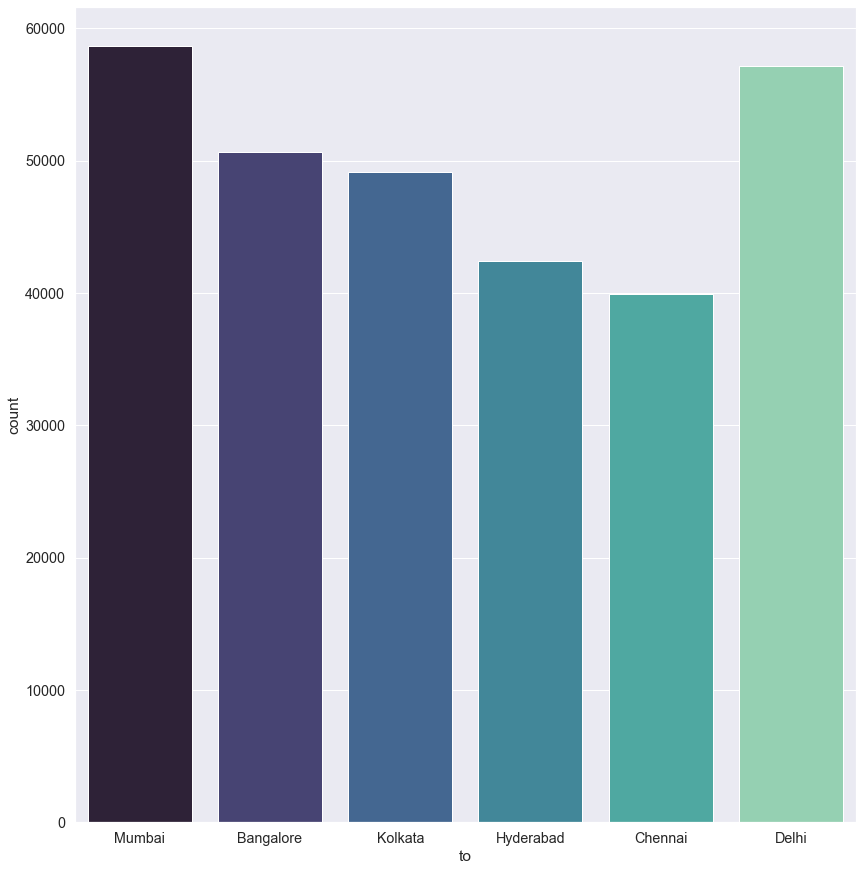

In [117]:
sns.countplot(data=df3,x='to',palette='mako')

#### What is the average price of a Economy airline ticket?

In [118]:
df3[df3['Class']=='Economy']['price'].mean()

6531.400375058603

#### What is the average price of a Business airline ticket?

In [119]:
df3[df3['Class']=='Business']['price'].mean()

52385.18012548936

#### What time do you have the most flights?

In [120]:
df3['departure_time'].value_counts().idxmax()

'Morning'

#### Most arrival time for flights ?

In [121]:
df3['arrival_time'].value_counts().idxmax()


'night'

#### Average flight hours for all airlines ?

<AxesSubplot:xlabel='airline', ylabel='duration'>

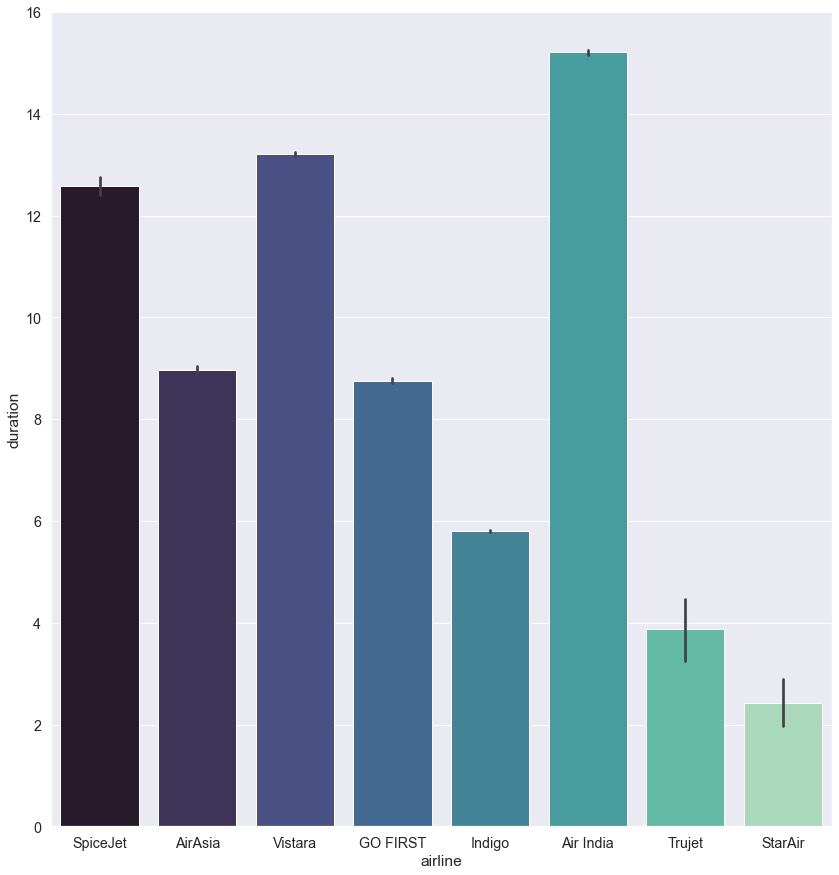

In [122]:
sns.barplot(data=df3,x="airline",y="duration",estimator=np.mean ,palette='mako')

#### Explain the relationship between duration and days

<AxesSubplot:xlabel='duration', ylabel='price'>

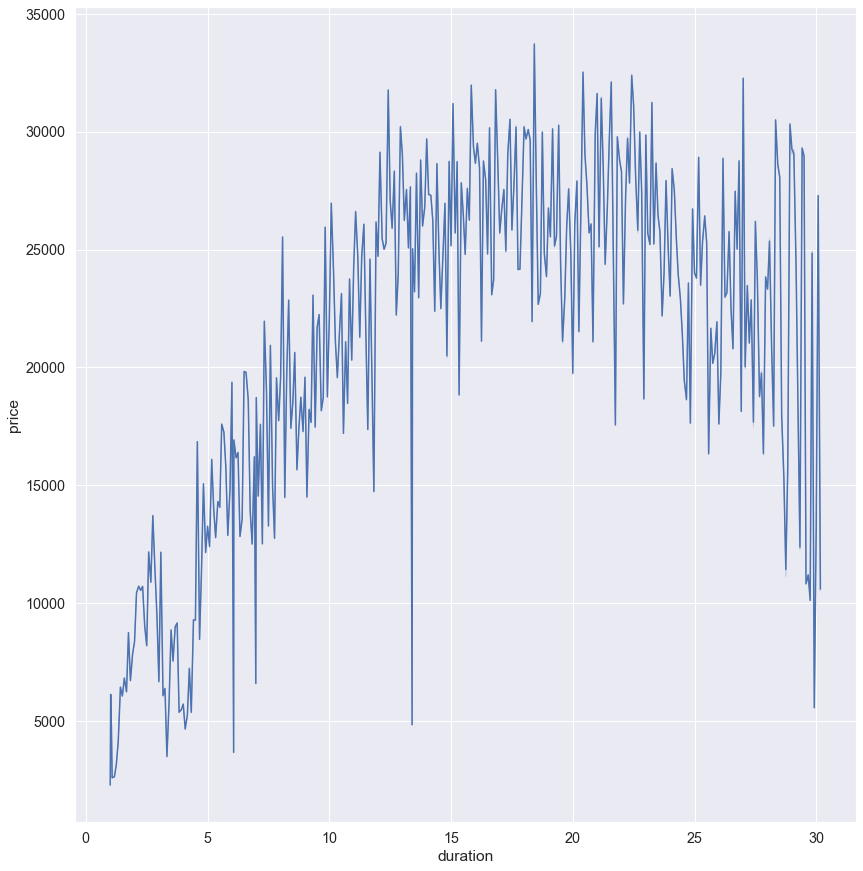

In [123]:
sns.lineplot(x='duration' , y='price' ,data=df3 , ci=True )

#### Explain the relationship between days left  and Price

<AxesSubplot:xlabel='days_left', ylabel='price'>

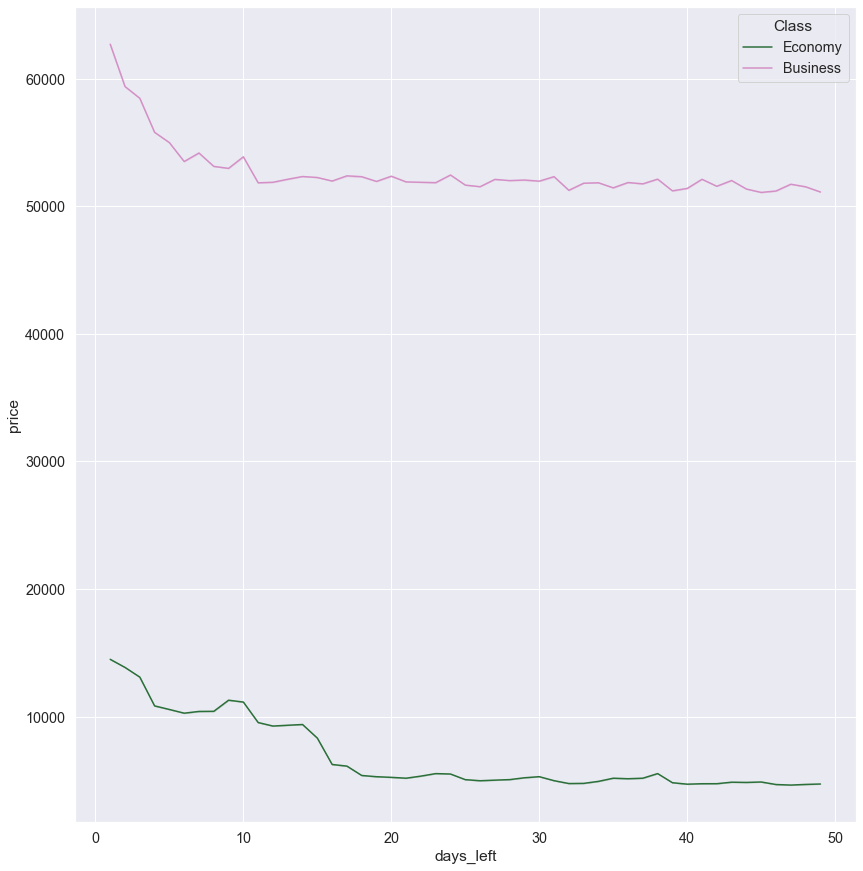

In [124]:
sns.lineplot(x='days_left' , y='price' ,data=df3 ,hue='Class' ,ci=True,palette ='cubehelix' )

### Model

In [125]:
df3

,date,airline,stop,to,price,Class,From,departure_time,arrival_time,flight,days_left,duration,Day
0,2022-02-11,SpiceJet,zero,Mumbai,5953,Economy,Delhi,Evening,night,SG-8709,1,2.17,Friday
1,2022-02-11,SpiceJet,zero,Mumbai,5953,Economy,Delhi,Early-Morning,Morning,SG-8157,1,2.33,Friday
2,2022-02-11,AirAsia,zero,Mumbai,5956,Economy,Delhi,Early-Morning,Early-Morning,I5-764,1,2.17,Friday
3,2022-02-11,Vistara,zero,Mumbai,5955,Economy,Delhi,Morning,Afternoon,UK-995,1,2.25,Friday
4,2022-02-11,Vistara,zero,Mumbai,5955,Economy,Delhi,Morning,Morning,UK-963,1,2.33,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297998,2022-03-31,Vistara,one,Hyderabad,69265,Business,Chennai,Morning,Evening,UK-822,49,10.08,Thursday
297999,2022-03-31,Vistara,one,Hyderabad,77105,Business,Chennai,Afternoon,night,UK-826,49,10.42,Thursday
298000,2022-03-31,Vistara,one,Hyderabad,79099,Business,Chennai,Early-Morning,night,UK-832,49,13.83,Thursday
298001,2022-03-31,Vistara,one,Hyderabad,81585,Business,Chennai,Early-Morning,Evening,UK-828,49,10.00,Thursday


In [126]:
X = df3.drop(['price','date'],axis = 1)
y = df3['price']

In [127]:
X = pd.get_dummies(X,drop_first=True)

In [128]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)
print('R2 value',lr.score(x_test_scaled,y_test))
print('mean square error',mean_squared_error(y_test,y_pred))

R2 value -8.143729527435784e+21
mean square error 4.19166667339074e+30


In [131]:
y_test

151645    12748
81796      3000
49153      2464
281949    74981
108956     3393
          ...  
218955    47408
246658    32923
43987     11139
16963      4205
172380     2393
Name: price, Length: 59601, dtype: int32

In [132]:
df3

,date,airline,stop,to,price,Class,From,departure_time,arrival_time,flight,days_left,duration,Day
0,2022-02-11,SpiceJet,zero,Mumbai,5953,Economy,Delhi,Evening,night,SG-8709,1,2.17,Friday
1,2022-02-11,SpiceJet,zero,Mumbai,5953,Economy,Delhi,Early-Morning,Morning,SG-8157,1,2.33,Friday
2,2022-02-11,AirAsia,zero,Mumbai,5956,Economy,Delhi,Early-Morning,Early-Morning,I5-764,1,2.17,Friday
3,2022-02-11,Vistara,zero,Mumbai,5955,Economy,Delhi,Morning,Afternoon,UK-995,1,2.25,Friday
4,2022-02-11,Vistara,zero,Mumbai,5955,Economy,Delhi,Morning,Morning,UK-963,1,2.33,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297998,2022-03-31,Vistara,one,Hyderabad,69265,Business,Chennai,Morning,Evening,UK-822,49,10.08,Thursday
297999,2022-03-31,Vistara,one,Hyderabad,77105,Business,Chennai,Afternoon,night,UK-826,49,10.42,Thursday
298000,2022-03-31,Vistara,one,Hyderabad,79099,Business,Chennai,Early-Morning,night,UK-832,49,13.83,Thursday
298001,2022-03-31,Vistara,one,Hyderabad,81585,Business,Chennai,Early-Morning,Evening,UK-828,49,10.00,Thursday


In [133]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train)
y_pred = dt.predict(x_test_scaled)
print('R2 value',dt.score(x_test_scaled,y_test))
print('mean square error',mean_squared_error(y_test,y_pred))

R2 value 0.9769886693319649
mean square error 11844183.61963306


In [134]:
y_test

151645    12748
81796      3000
49153      2464
281949    74981
108956     3393
          ...  
218955    47408
246658    32923
43987     11139
16963      4205
172380     2393
Name: price, Length: 59601, dtype: int32

In [135]:
y_pred

array([9073., 3000., 2464., ..., 5943., 4205., 2393.])

In [136]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
kfold = KFold(n_splits=5)
score = cross_validate(dt,x_train_scaled,y_train,cv=kfold)

In [137]:
score #لو لقيت ال5 ارقام قريبين لبعض اعرف ان المودل ده هيشتغل على التيست داتا كويس واعرف ان مفيش اوفر فيتينج

{'fit_time': array([73.39779067, 70.79633689, 60.35971093, 64.69083142, 75.27146792]),
 'score_time': array([1.65105391, 1.13996792, 1.61808395, 1.54597378, 1.05967164]),
 'test_score': array([0.97290726, 0.97322521, 0.97655504, 0.97425997, 0.97443192])}

In [138]:
#from sklearn.model_selection import GridSearchCV
#parm= {'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["squared_error", "friedman_mse","absolute_error","poisson"],'splitter':["best","random"]}
#grid = GridSearchCV(dt,param_grid=parm,cv=5)
#grid.fit(x_train_scaled,y_train)


In [139]:
df3

,date,airline,stop,to,price,Class,From,departure_time,arrival_time,flight,days_left,duration,Day
0,2022-02-11,SpiceJet,zero,Mumbai,5953,Economy,Delhi,Evening,night,SG-8709,1,2.17,Friday
1,2022-02-11,SpiceJet,zero,Mumbai,5953,Economy,Delhi,Early-Morning,Morning,SG-8157,1,2.33,Friday
2,2022-02-11,AirAsia,zero,Mumbai,5956,Economy,Delhi,Early-Morning,Early-Morning,I5-764,1,2.17,Friday
3,2022-02-11,Vistara,zero,Mumbai,5955,Economy,Delhi,Morning,Afternoon,UK-995,1,2.25,Friday
4,2022-02-11,Vistara,zero,Mumbai,5955,Economy,Delhi,Morning,Morning,UK-963,1,2.33,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297998,2022-03-31,Vistara,one,Hyderabad,69265,Business,Chennai,Morning,Evening,UK-822,49,10.08,Thursday
297999,2022-03-31,Vistara,one,Hyderabad,77105,Business,Chennai,Afternoon,night,UK-826,49,10.42,Thursday
298000,2022-03-31,Vistara,one,Hyderabad,79099,Business,Chennai,Early-Morning,night,UK-832,49,13.83,Thursday
298001,2022-03-31,Vistara,one,Hyderabad,81585,Business,Chennai,Early-Morning,Evening,UK-828,49,10.00,Thursday


In [140]:
X = df3.drop(['price','date'],axis=1)
y = df3['price']

In [141]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [142]:
numeric_column = x_train.select_dtypes(exclude='object').columns

In [143]:
cat_column = x_train.select_dtypes(include='object').columns

In [144]:
numeric_column

Index(['days_left', 'duration'], dtype='object')

In [145]:
cat_column

Index(['airline', 'stop', 'to', 'Class', 'From', 'departure_time',
       'arrival_time', 'flight', 'Day'],
      dtype='object')

In [146]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
numeric_transformer = Pipeline([('impute',SimpleImputer(strategy='median')),
                                ('scaler',StandardScaler(with_mean=False))])

In [147]:
cat_transformer = Pipeline([('impute',SimpleImputer(strategy='most_frequent')),
                            ('encode',OneHotEncoder()),
                            ('scaler',StandardScaler(with_mean=False))])

In [148]:
from sklearn.compose import ColumnTransformer
preprocess = ColumnTransformer(transformers=[('num',numeric_transformer,numeric_column),
                                             ('cat',cat_transformer,cat_column)])

In [149]:
preprocess

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['days_left', 'duration'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode', OneHotEncoder()),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['airline', 'stop', 'to', 'Class', 'From', 'departure_time',
       'arrival_time', 'flight', 'Day'],
      dtype='object'))])

In [150]:
pipe = Pipeline([('preprocc',preprocess),
                 ('model',DecisionTreeRegressor())])

In [151]:
pipe

Pipeline(steps=[('preprocc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['days_left', 'duration'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder()),
                                                 

In [152]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['days_left', 'duration'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder()),
                                                 

In [153]:
import joblib 
joblib.dump(pipe,'model.pkl')

['model.pkl']

In [154]:
model = joblib.load('model.pkl')

In [155]:
df3

,date,airline,stop,to,price,Class,From,departure_time,arrival_time,flight,days_left,duration,Day
0,2022-02-11,SpiceJet,zero,Mumbai,5953,Economy,Delhi,Evening,night,SG-8709,1,2.17,Friday
1,2022-02-11,SpiceJet,zero,Mumbai,5953,Economy,Delhi,Early-Morning,Morning,SG-8157,1,2.33,Friday
2,2022-02-11,AirAsia,zero,Mumbai,5956,Economy,Delhi,Early-Morning,Early-Morning,I5-764,1,2.17,Friday
3,2022-02-11,Vistara,zero,Mumbai,5955,Economy,Delhi,Morning,Afternoon,UK-995,1,2.25,Friday
4,2022-02-11,Vistara,zero,Mumbai,5955,Economy,Delhi,Morning,Morning,UK-963,1,2.33,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297998,2022-03-31,Vistara,one,Hyderabad,69265,Business,Chennai,Morning,Evening,UK-822,49,10.08,Thursday
297999,2022-03-31,Vistara,one,Hyderabad,77105,Business,Chennai,Afternoon,night,UK-826,49,10.42,Thursday
298000,2022-03-31,Vistara,one,Hyderabad,79099,Business,Chennai,Early-Morning,night,UK-832,49,13.83,Thursday
298001,2022-03-31,Vistara,one,Hyderabad,81585,Business,Chennai,Early-Morning,Evening,UK-828,49,10.00,Thursday


In [156]:
%%writefile app.py
import numpy as np
import pandas as pd
import streamlit as st 
import joblib

regressor=joblib.load('model.pkl')


def welcome():
    return "Welcome All"


def predict_Price(airline,From,stop,to,Class,departure_time,arrival_time,flight,days_left,duration,Day):
  prediction =regressor.predict(pd.DataFrame({'airline':[airline],'From':[From],'stop':[stop],'to':[to],'Class':[Class],'departure_time':[departure_time],'arrival_time':[arrival_time],'flight':[flight],'days_left':[days_left],'duration':[duration],'Day':[Day]}))
  print(prediction)
  return  prediction
def main():
    st.title(" Flight Price Prediction")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Flight Price prediction App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    airline = st.text_input("airline","Type Here")
    From = st.text_input("From","Type Here")
    stop = st.text_input("stop","Type Here")
    to = st.text_input("to","Type Here")
    Class = st.text_input("Class","Type Here")
    departure_time = st.text_input("departure_time","Type Here")
    flight = st.text_input("flight","Type Here")
    arrival_time = st.text_input("arrival_time","Type Here")
    days_left = st.text_input("days_left","Type Here")
    duration = st.text_input("duration","Type Here")
    Day = st.text_input("Day","Type Here")
    result=""
    if st.button("Predict"):
        result=predict_Price(airline,From,stop,to,Class,departure_time,arrival_time,flight,days_left,duration,Day)
    st.success('The expenses is {} INR'.format(result))
    if st.button("About"):
        st.text("our app using streamlit")
if __name__=='__main__':
    main()        


Overwriting app.py


In [ ]:
!streamlit run app.py